In [ ]:
PHROG específicos y característicos

In [1]:
import pandas as pd
import os

# Cargar datos
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Columnas PHROGs
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]

# Niveles taxonómicos
niveles_taxonomicos = ["Species", "Genus", "Family", "Class", "Phylum", "Kingdom"]

# Ruta de salida
ruta_salida = "/home/alumno08/TFM/fase2/5_phrogs"
os.makedirs(ruta_salida, exist_ok=True)

# Umbral para considerar un PHROG característico (porcentaje de presencia dentro del grupo)
umbral = 70

for nivel in niveles_taxonomicos:
    
    print(f"Analizando nivel: {nivel}")
    
    # PHROGs característicos
    porcentaje = df.groupby(nivel)[phrog_cols].mean() * 100
    phrogs_caracteristicos = {}

    for grupo in porcentaje.index:
        phrogs = porcentaje.loc[grupo][porcentaje.loc[grupo] > umbral].index.tolist()
        phrogs_caracteristicos[grupo] = phrogs

    # Guardar tabla de característicos
    df_caracteristicos = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in phrogs_caracteristicos.items()]))
    ruta_carac = os.path.join(ruta_salida, f"phrogs_caracteristicos_por_{nivel.lower()}.tsv")
    df_caracteristicos.to_csv(ruta_carac, sep="\t", index=False)
    print(f"Guardado: {ruta_carac}")

    # PHROGs específicos
    presencia = df.groupby(nivel)[phrog_cols].sum() > 0
    phrogs_especificos = {}

    for phrog in phrog_cols:
        grupos_donde_aparece = presencia[presencia[phrog]].index.tolist()
        if len(grupos_donde_aparece) == 1:
            grupo = grupos_donde_aparece[0]
            phrogs_especificos.setdefault(grupo, []).append(phrog)

    # Guardar tabla de específicos
    df_especificos = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in phrogs_especificos.items()]))
    ruta_espec = os.path.join(ruta_salida, f"phrogs_especificos_por_{nivel.lower()}.tsv")
    df_especificos.to_csv(ruta_espec, sep="\t", index=False)
    print(f"Guardado: {ruta_espec}")

print("Análisis completado.")

Analizando nivel: Species
Guardado: /home/alumno08/TFM/fase2/5_phrogs/phrogs_caracteristicos_por_species.tsv
Guardado: /home/alumno08/TFM/fase2/5_phrogs/phrogs_especificos_por_species.tsv
Analizando nivel: Genus
Guardado: /home/alumno08/TFM/fase2/5_phrogs/phrogs_caracteristicos_por_genus.tsv
Guardado: /home/alumno08/TFM/fase2/5_phrogs/phrogs_especificos_por_genus.tsv
Analizando nivel: Family
Guardado: /home/alumno08/TFM/fase2/5_phrogs/phrogs_caracteristicos_por_family.tsv
Guardado: /home/alumno08/TFM/fase2/5_phrogs/phrogs_especificos_por_family.tsv
Analizando nivel: Class
Guardado: /home/alumno08/TFM/fase2/5_phrogs/phrogs_caracteristicos_por_class.tsv
Guardado: /home/alumno08/TFM/fase2/5_phrogs/phrogs_especificos_por_class.tsv
Analizando nivel: Phylum
Guardado: /home/alumno08/TFM/fase2/5_phrogs/phrogs_caracteristicos_por_phylum.tsv
Guardado: /home/alumno08/TFM/fase2/5_phrogs/phrogs_especificos_por_phylum.tsv
Analizando nivel: Kingdom
Guardado: /home/alumno08/TFM/fase2/5_phrogs/phrogs_c

In [ ]:
Gráfico de barras horizontal: porcentaje de PHROGs característicos por grupo

/tmp/ipykernel_2398631/877331614.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")


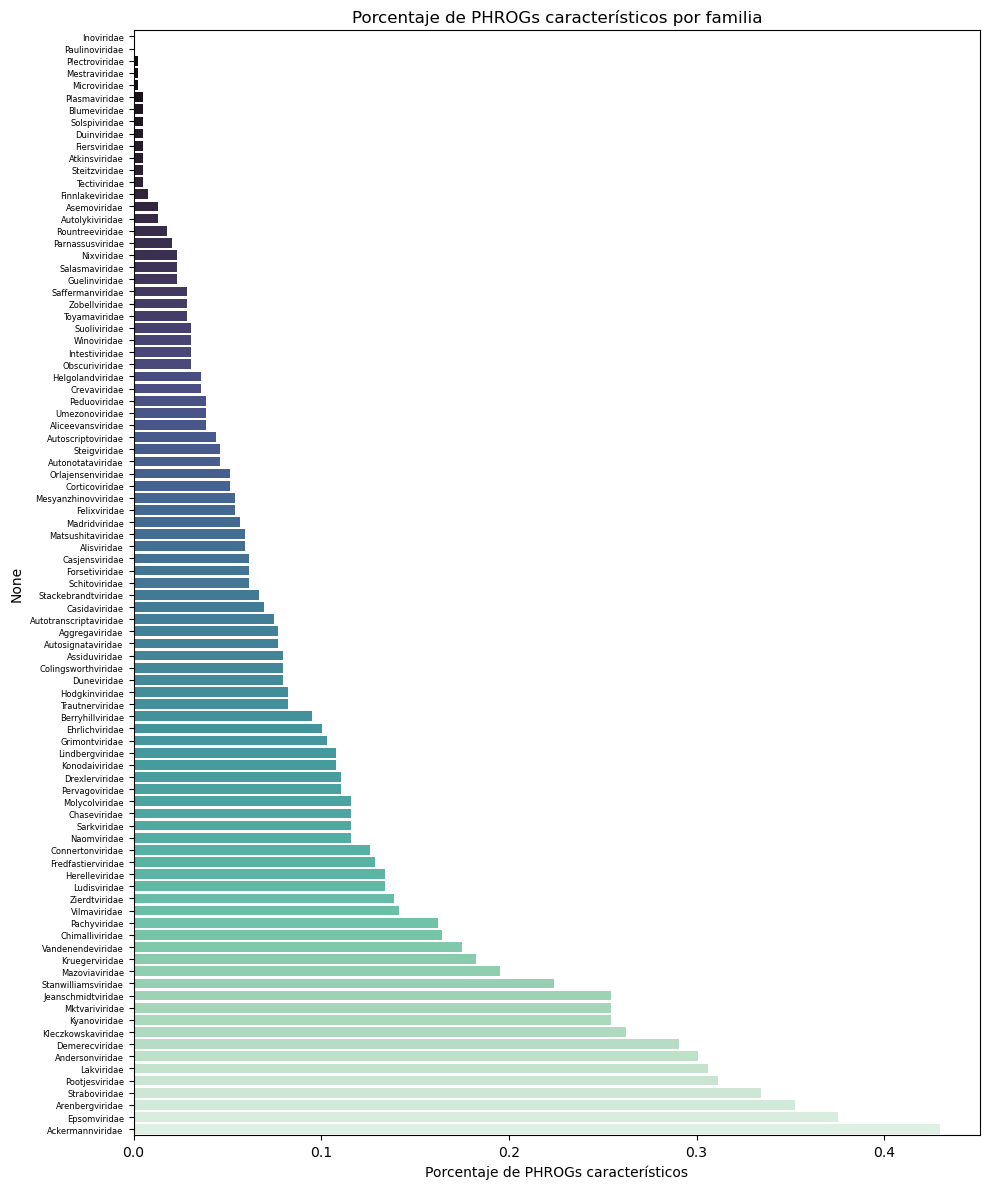

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tabla
df_caracteristicos = pd.read_csv("/home/alumno08/TFM/fase2/5_phrogs/phrogs_caracteristicos_por_family.tsv", sep="\t")

# Contar PHROGs característicos por grupo
conteo_caracteristicos = df_caracteristicos.count()

# Total de PHROGs posibles
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]
total_phrogs_posibles = len(phrog_cols)

# Calcular porcentaje
porcentaje_caracteristicos = (conteo_caracteristicos / total_phrogs_posibles) * 100

# Ordenar
porcentaje_caracteristicos = porcentaje_caracteristicos.sort_values(ascending=True)

# Gráfico
plt.figure(figsize=(10, 12))
sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")
plt.xlabel("Porcentaje de PHROGs característicos")
plt.title("Porcentaje de PHROGs característicos por familia")
plt.yticks(fontsize=6)
plt.tight_layout()
plt.savefig("/home/alumno08/TFM/fase2/5_phrogs/porcentaje_caracteristicos_por_family.png", dpi=300)
plt.show()

/tmp/ipykernel_2398631/148545227.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")


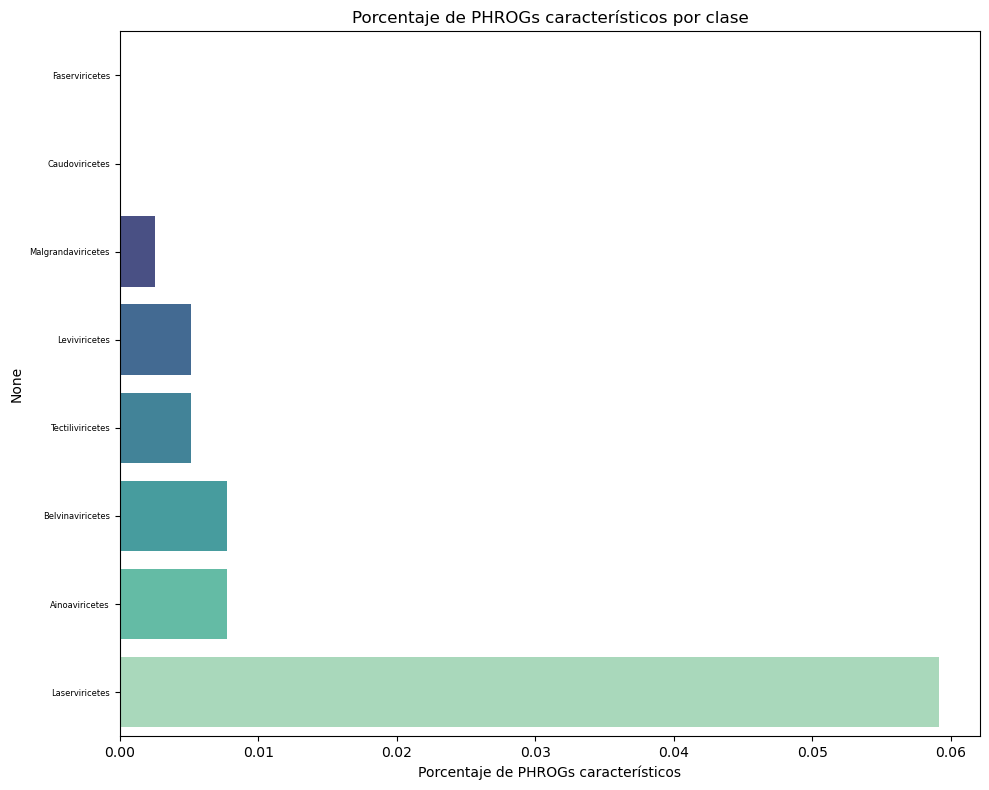

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tabla
df_caracteristicos = pd.read_csv("/home/alumno08/TFM/fase2/5_phrogs/phrogs_caracteristicos_por_class.tsv", sep="\t")

# Contar PHROGs característicos por grupo
conteo_caracteristicos = df_caracteristicos.count()

# Total de PHROGs posibles
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]
total_phrogs_posibles = len(phrog_cols)

# Calcular porcentaje
porcentaje_caracteristicos = (conteo_caracteristicos / total_phrogs_posibles) * 100

# Ordenar
porcentaje_caracteristicos = porcentaje_caracteristicos.sort_values(ascending=True)

# Gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")
plt.xlabel("Porcentaje de PHROGs característicos")
plt.title("Porcentaje de PHROGs característicos por clase")
plt.yticks(fontsize=6)
plt.tight_layout()
plt.savefig("/home/alumno08/TFM/fase2/5_phrogs/porcentaje_caracteristicos_por_class.png")
plt.show()

/tmp/ipykernel_2398631/1417717571.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")


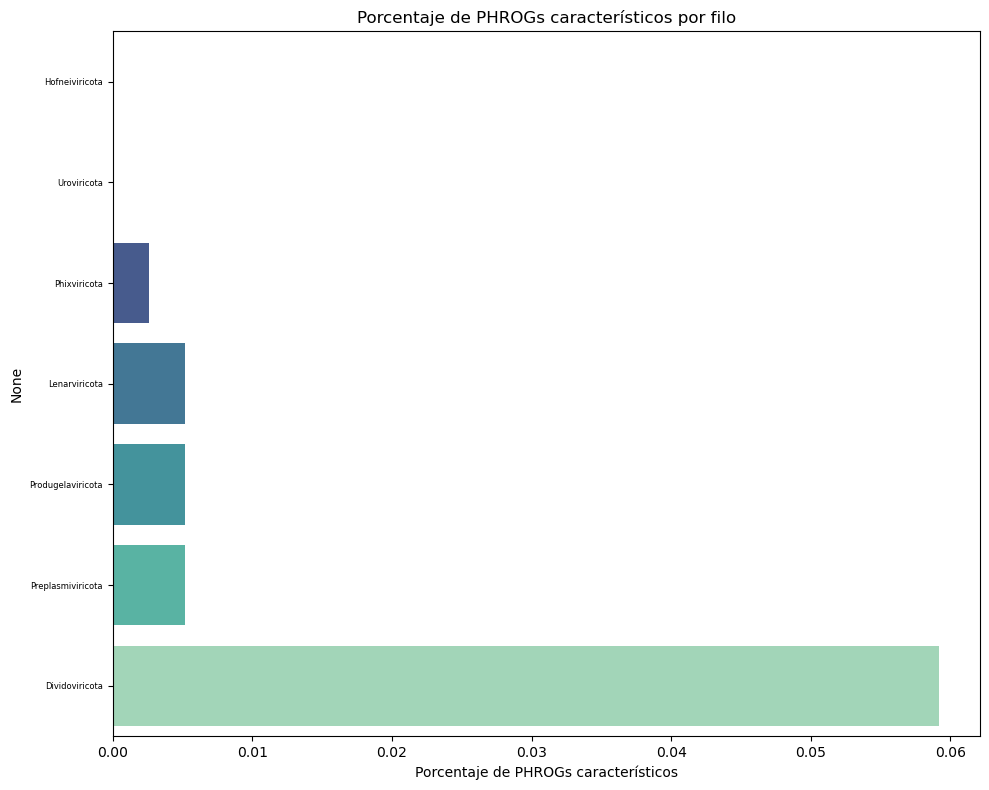

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tabla
df_caracteristicos = pd.read_csv("/home/alumno08/TFM/fase2/5_phrogs/phrogs_caracteristicos_por_phylum.tsv", sep="\t")

# Contar PHROGs característicos por grupo
conteo_caracteristicos = df_caracteristicos.count()

# Total de PHROGs posibles
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]
total_phrogs_posibles = len(phrog_cols)

# Calcular porcentaje
porcentaje_caracteristicos = (conteo_caracteristicos / total_phrogs_posibles) * 100

# Ordenar
porcentaje_caracteristicos = porcentaje_caracteristicos.sort_values(ascending=True)

# Gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")
plt.xlabel("Porcentaje de PHROGs característicos")
plt.title("Porcentaje de PHROGs característicos por filo")
plt.yticks(fontsize=6)
plt.tight_layout()
plt.savefig("/home/alumno08/TFM/fase2/5_phrogs/porcentaje_caracteristicos_por_phylum.png")
plt.show()

/tmp/ipykernel_2398631/461131369.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")


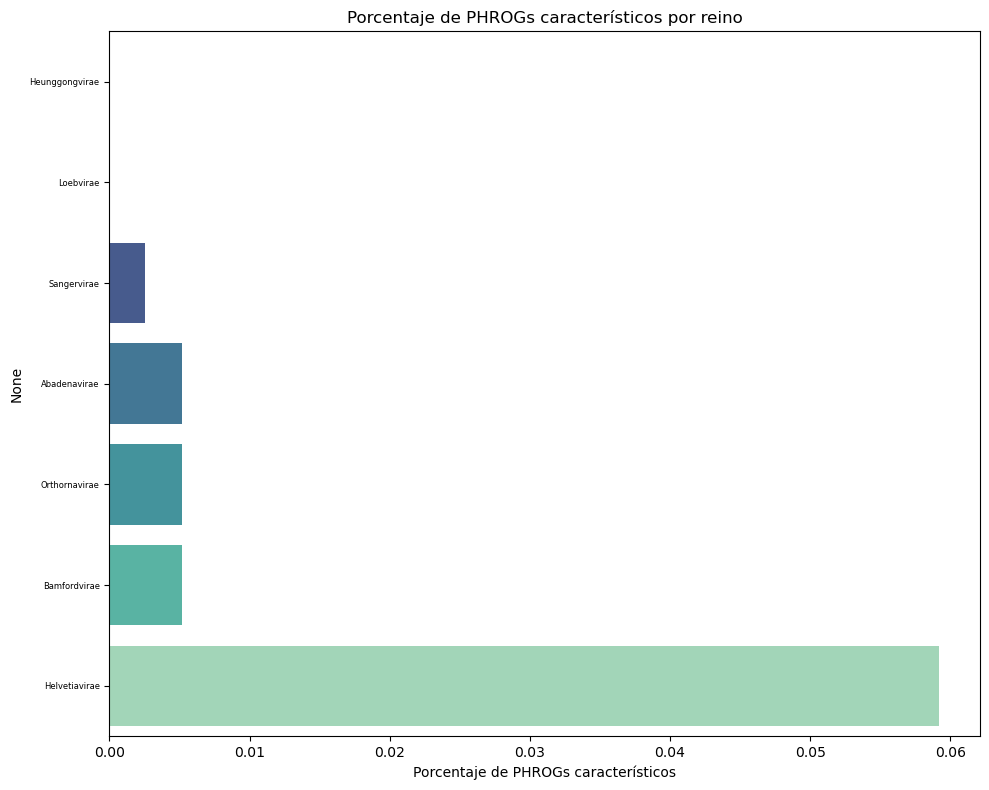

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tabla
df_caracteristicos = pd.read_csv("/home/alumno08/TFM/fase2/5_phrogs/phrogs_caracteristicos_por_kingdom.tsv", sep="\t")

# Contar PHROGs característicos por grupo
conteo_caracteristicos = df_caracteristicos.count()

# Total de PHROGs posibles
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]
total_phrogs_posibles = len(phrog_cols)

# Calcular porcentaje
porcentaje_caracteristicos = (conteo_caracteristicos / total_phrogs_posibles) * 100

# Ordenar
porcentaje_caracteristicos = porcentaje_caracteristicos.sort_values(ascending=True)

# Gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")
plt.xlabel("Porcentaje de PHROGs característicos")
plt.title("Porcentaje de PHROGs característicos por reino")
plt.yticks(fontsize=6)
plt.tight_layout()
plt.savefig("/home/alumno08/TFM/fase2/5_phrogs/porcentaje_caracteristicos_por_kingdom.png")
plt.show()

/tmp/ipykernel_2398631/928983167.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")


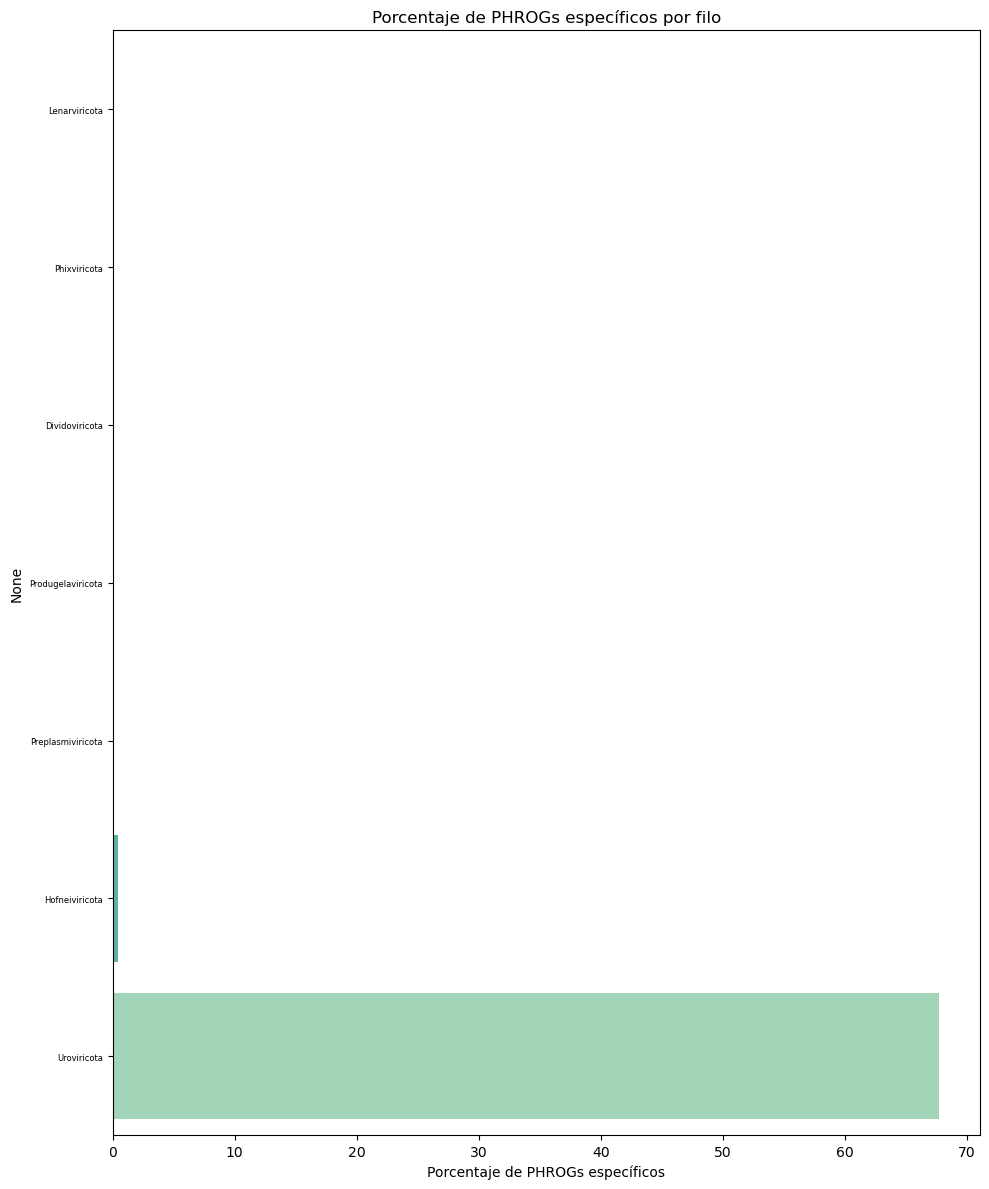

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tabla
df_caracteristicos = pd.read_csv("/home/alumno08/TFM/fase2/5_phrogs/phrogs_especificos_por_phylum.tsv", sep="\t")

# Contar PHROGs característicos por grupo
conteo_caracteristicos = df_caracteristicos.count()

# Total de PHROGs posibles
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]
total_phrogs_posibles = len(phrog_cols)

# Calcular porcentaje
porcentaje_caracteristicos = (conteo_caracteristicos / total_phrogs_posibles) * 100

# Ordenar
porcentaje_caracteristicos = porcentaje_caracteristicos.sort_values(ascending=True)

# Gráfico
plt.figure(figsize=(10, 12))
sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")
plt.xlabel("Porcentaje de PHROGs específicos")
plt.title("Porcentaje de PHROGs específicos por filo")
plt.yticks(fontsize=6)
plt.tight_layout()
plt.savefig("/home/alumno08/TFM/fase2/5_phrogs/porcentaje_especificos_por_phylum.png")
plt.show()

/tmp/ipykernel_2398631/928983167.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")


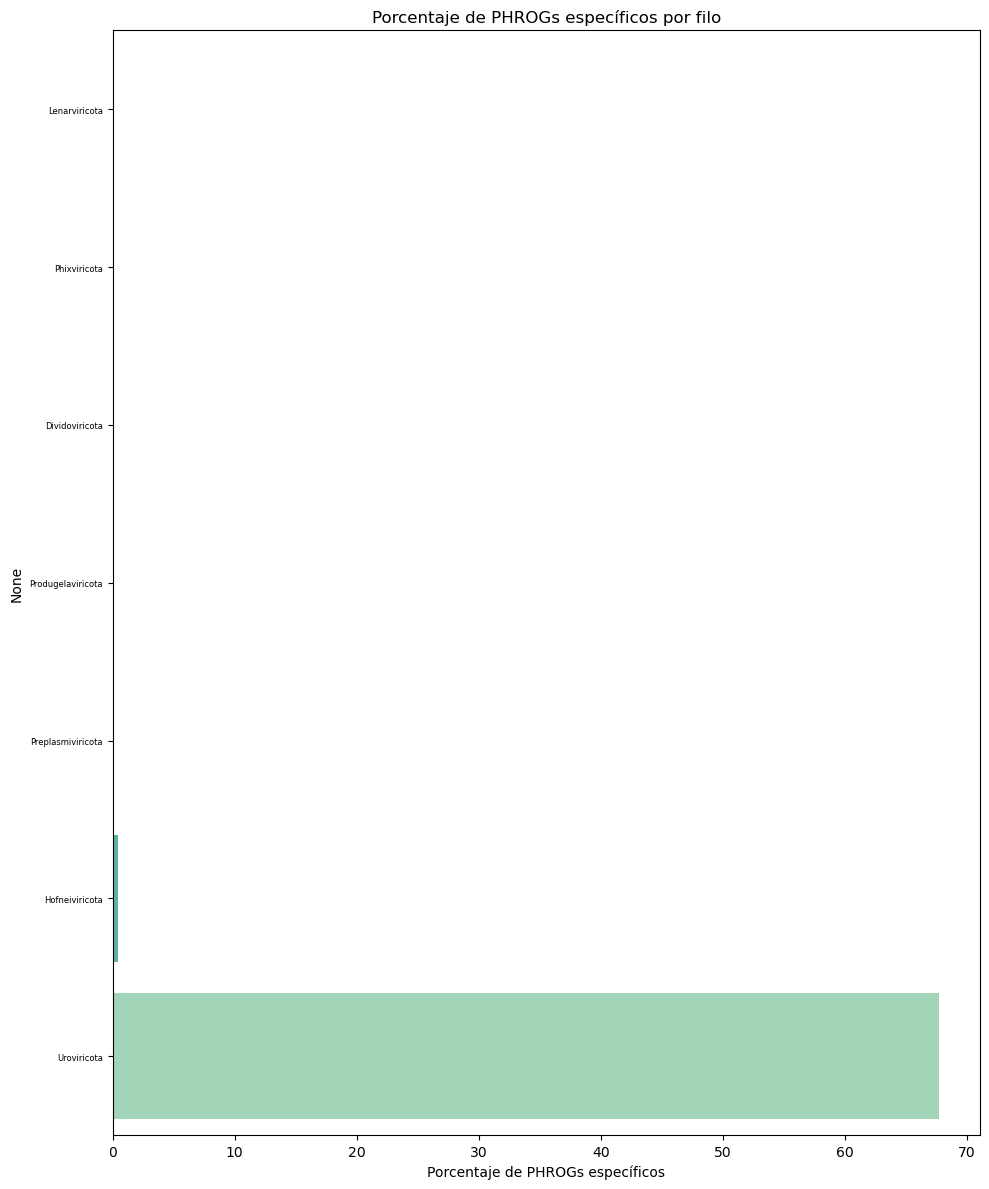

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tabla
df_caracteristicos = pd.read_csv("/home/alumno08/TFM/fase2/5_phrogs/phrogs_especificos_por_phylum.tsv", sep="\t")

# Contar PHROGs característicos por grupo
conteo_caracteristicos = df_caracteristicos.count()

# Total de PHROGs posibles
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]
total_phrogs_posibles = len(phrog_cols)

# Calcular porcentaje
porcentaje_caracteristicos = (conteo_caracteristicos / total_phrogs_posibles) * 100

# Ordenar
porcentaje_caracteristicos = porcentaje_caracteristicos.sort_values(ascending=True)

# Gráfico
plt.figure(figsize=(10, 12))
sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")
plt.xlabel("Porcentaje de PHROGs específicos")
plt.title("Porcentaje de PHROGs específicos por filo")
plt.yticks(fontsize=6)
plt.tight_layout()
plt.savefig("/home/alumno08/TFM/fase2/5_phrogs/porcentaje_especificos_por_phylum.png")
plt.show()

/tmp/ipykernel_2398631/928983167.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")


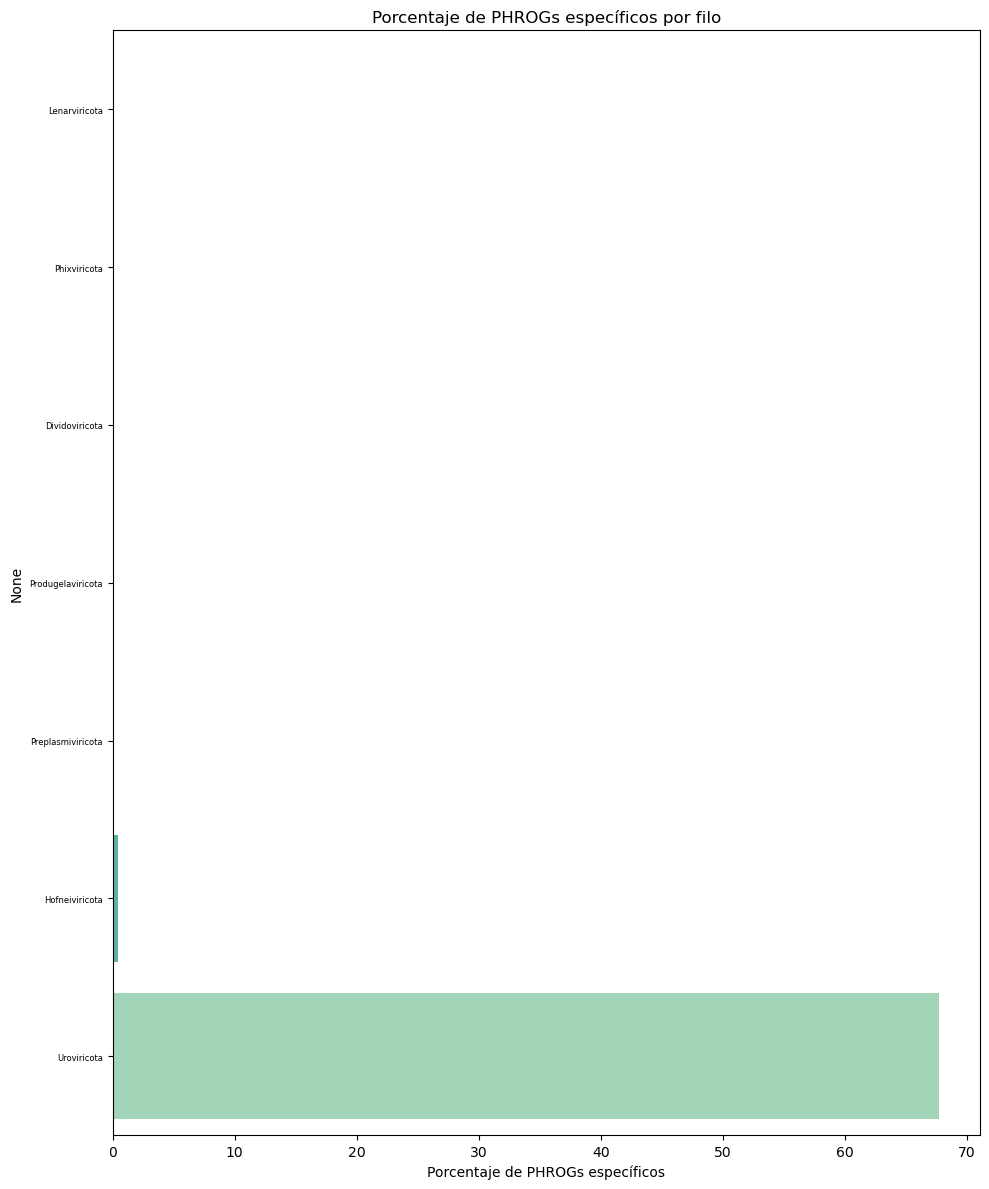

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tabla
df_caracteristicos = pd.read_csv("/home/alumno08/TFM/fase2/5_phrogs/phrogs_especificos_por_phylum.tsv", sep="\t")

# Contar PHROGs característicos por grupo
conteo_caracteristicos = df_caracteristicos.count()

# Total de PHROGs posibles
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]
total_phrogs_posibles = len(phrog_cols)

# Calcular porcentaje
porcentaje_caracteristicos = (conteo_caracteristicos / total_phrogs_posibles) * 100

# Ordenar
porcentaje_caracteristicos = porcentaje_caracteristicos.sort_values(ascending=True)

# Gráfico
plt.figure(figsize=(10, 12))
sns.barplot(x=porcentaje_caracteristicos.values, y=porcentaje_caracteristicos.index, palette="mako")
plt.xlabel("Porcentaje de PHROGs específicos")
plt.title("Porcentaje de PHROGs específicos por filo")
plt.yticks(fontsize=6)
plt.tight_layout()
plt.savefig("/home/alumno08/TFM/fase2/5_phrogs/porcentaje_especificos_por_phylum.png")
plt.show()

In [ ]:
Explorar información del dataset

In [2]:
import os
import shutil
from glob import glob

# Directorio de destino
destino = "/home/alumno08/TFM/fase2/5_imagenes"
os.makedirs(destino, exist_ok=True)

# Buscar todas las imágenes PNG en el directorio actual
imagenes = glob("*.png")

# Mover cada imagen
for img in imagenes:
    shutil.move(img, os.path.join(destino, img))
    print(f" Movida: {img} → {destino}")

In [ ]:
PHROGs

In [ ]:
Estudiar rápidamente los PHROGs más y menos repetidos

In [1]:
import pandas as pd

# Cargar el dataframe
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t")

# Filtrar columnas que correspondan a PHROGs
# Ejemplo: columnas que empiezan por "phrog" (ajusta si es diferente)
phrog_columns = [col for col in df.columns if col.lower().startswith("phrog")]

# Contar cuántos 1 hay en cada PHROG
phrog_counts = df[phrog_columns].sum(axis=0).sort_values(ascending=False)

# Mostrar los 10 PHROGs más y menos frecuentes
print(phrog_counts.head(10))
print(phrog_counts.tail(10))

/tmp/ipykernel_2210921/132195692.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t")


PHROG_107    1867
PHROG_19     1531
PHROG_22     1442
PHROG_139    1419
PHROG_114    1139
PHROG_47     1110
PHROG_267    1063
PHROG_239     983
PHROG_457     962
PHROG_449     961
dtype: int64
PHROG_38804    0
PHROG_38805    0
PHROG_8309     0
PHROG_38797    0
PHROG_38798    0
PHROG_38799    0
PHROG_38781    0
PHROG_38782    0
PHROG_38784    0
PHROG_38785    0
dtype: int64


In [ ]:
PHROGs más abundantes por cada grupo taxonómico

In [2]:
import pandas as pd

# Cargar tu archivo
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Detectar columnas de PHROGs
phrog_columns = [col for col in df.columns if col.startswith("PHROG_")]
df[phrog_columns] = df[phrog_columns].apply(pd.to_numeric, errors="coerce")

# Niveles taxonómicos que existen en tu archivo
niveles_taxonomicos = ["Species", "Genus", "Family", "Class", "Phylum", "Kingdom"]

# Convertir a formato largo
df_long = df.melt(id_vars=niveles_taxonomicos, value_vars=phrog_columns,
                  var_name="PHROG", value_name="presencia")

# Filtrar sólo PHROGs presentes
df_presentes = df_long[df_long["presencia"] == 1]

# Guardar archivo por cada nivel
for nivel in niveles_taxonomicos:
    if nivel in df.columns:
        conteo = (
            df_presentes.groupby([nivel, "PHROG"])
            .size()
            .reset_index(name="frecuencia")
            .sort_values("frecuencia", ascending=False)
        )
        conteo.to_csv(f"frecuencia_phrogs_por_{nivel.lower()}.tsv", sep="\t", index=False)
        print(f"Guardado: frecuencia_phrogs_por_{nivel.lower()}.tsv")

Guardado: frecuencia_phrogs_por_species.tsv
Guardado: frecuencia_phrogs_por_genus.tsv
Guardado: frecuencia_phrogs_por_family.tsv
Guardado: frecuencia_phrogs_por_class.tsv
Guardado: frecuencia_phrogs_por_phylum.tsv
Guardado: frecuencia_phrogs_por_kingdom.tsv


In [ ]:
Ahora se van a representar esos datos

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Lista de niveles taxonómicos
niveles_taxonomicos = ["species", "genus", "family", "class", "phylum", "kingdom"]

# Ruta base donde están los archivos TSV
ruta_base = "./"  # cambia esto si los archivos están en otra carpeta

# Generar un heatmap para cada archivo
for nivel in niveles_taxonomicos:
    ruta = os.path.join(ruta_base, f"frecuencia_phrogs_por_{nivel}.tsv")
    
    if os.path.exists(ruta):
        print(f"Generando heatmap para {nivel}")

        # Leer archivo
        df = pd.read_csv(ruta, sep="\t")

        # Crear tabla con filas = grupo taxonómico, columnas = PHROGs, valores = frecuencia
        heatmap_data = df.pivot(index=nivel.capitalize(), columns="PHROG", values="frecuencia").fillna(0)

        # Seleccionar las 50 PHROGs más frecuentes
        top_phrogs = df.groupby("PHROG")["frecuencia"].sum().sort_values(ascending=False).head(50).index
        heatmap_data = heatmap_data[top_phrogs]

        # Limitar a 30 grupos taxonómicos para facilitar la visualización
        heatmap_data = heatmap_data.head(30)

        # Dibujar heatmap
        plt.figure(figsize=(16, 10))
        sns.heatmap(heatmap_data, cmap="viridis", linewidths=0.2, linecolor='gray')
        plt.title(f"Distribución de los PHROGs más frecuentes por {nivel.capitalize()}")
        plt.xlabel("PHROGs")
        plt.ylabel(nivel.capitalize())
        plt.tight_layout()

        # Guardar la figura
        plt.savefig(f"heatmap_phrogs_por_{nivel}.png", dpi=300)
        plt.close()

        print(f"Guardado: heatmap_phrogs_por_{nivel}.png")
    else:
        print(f"No se encontró el archivo: {ruta}")

Generando heatmap para species
Guardado: heatmap_phrogs_por_species.png
Generando heatmap para genus
Guardado: heatmap_phrogs_por_genus.png
Generando heatmap para family
Guardado: heatmap_phrogs_por_family.png
Generando heatmap para class
Guardado: heatmap_phrogs_por_class.png
Generando heatmap para phylum
Guardado: heatmap_phrogs_por_phylum.png
Generando heatmap para kingdom
Guardado: heatmap_phrogs_por_kingdom.png


In [ ]:
número de PHROGs por grupos

In [5]:
import pandas as pd

# Cargar el dataframe
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Filtrar columnas PHROG (ajusta si tu prefijo es diferente)
phrog_columns = [col for col in df.columns if col.lower().startswith("phrog")]

# Agrupar por Family y sumar los PHROGs binarios (cuenta cuántos '1's hay por PHROG en cada Family)
phrog_sums_by_family = df.groupby("Family")[phrog_columns].sum()

# Contar cuántos PHROGs diferentes hay en cada Family (al menos un '1' en la suma)
phrog_counts_by_family = (phrog_sums_by_family > 0).sum(axis=1)

# Ordenar de mayor a menor
phrog_counts_by_family_sorted = phrog_counts_by_family.sort_values(ascending=False)

# Mostrar resultados
print(phrog_counts_by_family_sorted)

Family
Herelleviridae     2355
Straboviridae      2133
Chimalliviridae    1621
Kyanoviridae       1135
Schitoviridae       915
                   ... 
Finnlakeviridae       3
Solspiviridae         2
Plasmaviridae         2
Duinviridae           2
Atkinsviridae         2
Length: 91, dtype: int64


/tmp/ipykernel_2210921/2590267912.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=phrog_counts_by_family_sorted, x="Family", y="num_phrogs", palette="mako")


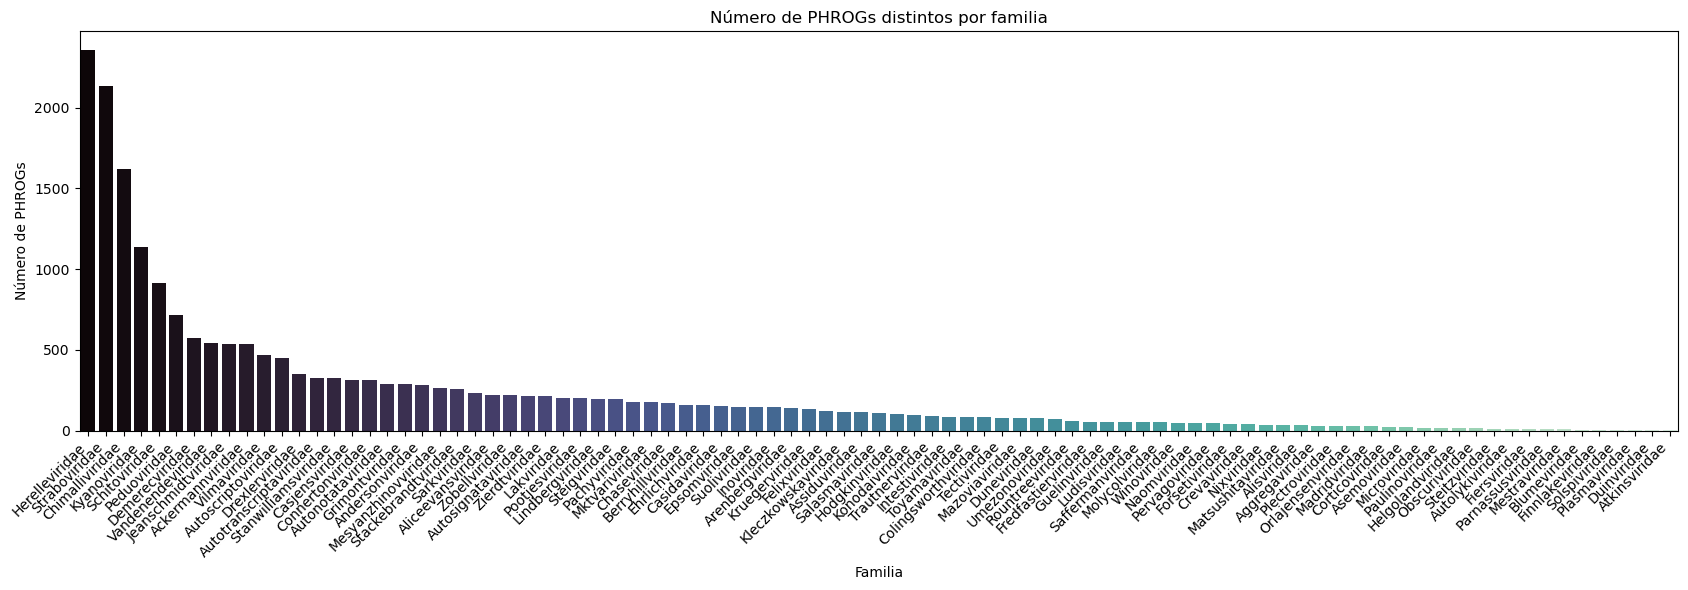

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Seleccionar columnas PHROG
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]

# Agrupar por Family y contar PHROGs presentes (valor > 0)
phrog_por_family = df.groupby("Family")[phrog_cols].sum()
phrog_counts_by_family = (phrog_por_family > 0).sum(axis=1).reset_index()
phrog_counts_by_family.columns = ["Family", "num_phrogs"]

# Ordenar familias de mayor a menor número de PHROGs
phrog_counts_by_family_sorted = phrog_counts_by_family.sort_values("num_phrogs", ascending=False)

# Graficar
plt.figure(figsize=(17, 6))
sns.barplot(data=phrog_counts_by_family_sorted, x="Family", y="num_phrogs", palette="mako")
plt.xticks(rotation=45, ha="right")
plt.title("Número de PHROGs distintos por familia")
plt.xlabel("Familia")
plt.ylabel("Número de PHROGs")
plt.tight_layout()
plt.savefig("/home/alumno08/TFM/fase2/5_imagenes/phrogs_por_familia.png", dpi=300)
plt.show()

In [7]:
import pandas as pd

# Cargar el dataframe
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Filtrar columnas PHROG (ajusta si tu prefijo es diferente)
phrog_columns = [col for col in df.columns if col.lower().startswith("phrog")]

# Agrupar por Genus y sumar los PHROGs binarios (cuenta cuántos '1's hay por PHROG en cada genus)
phrog_sums_by_genus = df.groupby("Genus")[phrog_columns].sum()

# Contar cuántos PHROGs diferentes hay en cada genus (al menos un '1' en la suma)
phrog_counts_by_genus = (phrog_sums_by_genus > 0).sum(axis=1)

# Ordenar de mayor a menor
phrog_counts_by_genus_sorted = phrog_counts_by_genus.sort_values(ascending=False)

# Mostrar resultados
print(phrog_counts_by_genus_sorted)

Genus
Mimasvirus             518
Eneladusvirus          494
Asteriusvirus          481
Fromanvirus            466
Schizotequatrovirus    401
                      ... 
Sperdavirus              1
Gifriavirus              1
Fluruvirus               1
Frobavirus               1
Plectrovirus             0
Length: 2034, dtype: int64


In [8]:
import pandas as pd

# Cargar el dataframe
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Filtrar columnas PHROG (ajusta si tu prefijo es diferente)
phrog_columns = [col for col in df.columns if col.lower().startswith("phrog")]

# Agrupar por Species y sumar los PHROGs binarios (cuenta cuántos '1's hay por PHROG en cada Species)
phrog_sums_by_species = df.groupby("Species")[phrog_columns].sum()

# Contar cuántos PHROGs diferentes hay en cada Species (al menos un '1' en la suma)
phrog_counts_by_species = (phrog_sums_by_species > 0).sum(axis=1)

# Ordenar de mayor a menor
phrog_counts_by_species_sorted = phrog_counts_by_species.sort_values(ascending=False)

# Mostrar resultados
print(phrog_counts_by_species_sorted)

Species
Mimasvirus CBB              482
Mimasvirus GAP32            475
Asteriusvirus av121Q        474
Asteriusvirus PBECO4        472
Eneladusvirus BF            459
                           ... 
Frobavirus limivivens         1
Giliycovirus terrenecus       1
Gehrmavirus geocola           1
Kihsiravirus limivicinum      1
Plectrovirus L51              0
Length: 6643, dtype: int64


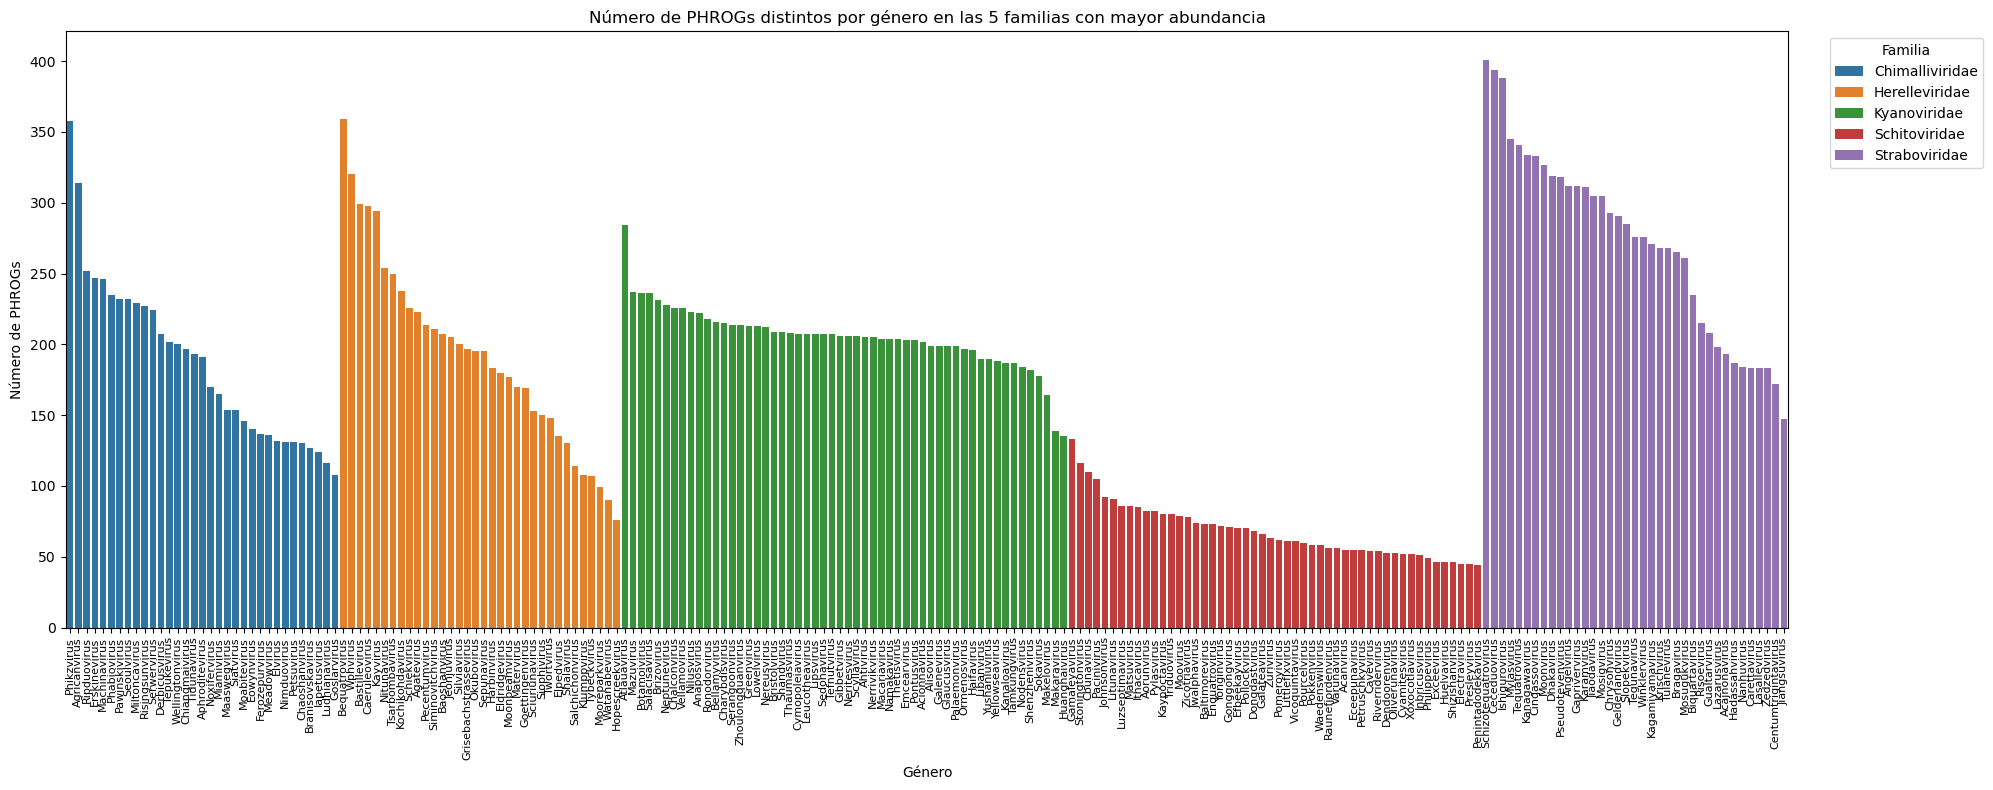

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar matriz
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Detectar columnas PHROG
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]

# Calcular número de PHROGs distintos por familia
phrogs_por_fam = (df.groupby("Family")[phrog_cols].sum() > 0).sum(axis=1)
top5_families = phrogs_por_fam.sort_values(ascending=False).head(5).index.tolist()

# Filtrar solo esas familias
df_top = df[df["Family"].isin(top5_families)]

# Agrupar por Family y Genus, sumar PHROGs y contar cuántos están presentes
genus_family_phrog_sum = df_top.groupby(["Family", "Genus"])[phrog_cols].sum()
phrog_counts = (genus_family_phrog_sum > 0).sum(axis=1).reset_index()
phrog_counts.columns = ["Family", "Genus", "num_phrogs"]

# Ordenar por familia y PHROGs
phrog_counts = phrog_counts.sort_values(["Family", "num_phrogs"], ascending=[True, False])

# Graficar
plt.figure(figsize=(20, 8))
sns.barplot(data=phrog_counts, x="Genus", y="num_phrogs", hue="Family", dodge=False)
plt.xticks(rotation=90, ha="center", fontsize=8)
plt.ylabel("Número de PHROGs")
plt.xlabel("Género")
plt.title("Número de PHROGs distintos por género en las 5 familias con mayor abundancia")
plt.legend(title="Familia", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("/home/alumno08/TFM/fase2/5_imagenes/top5_familias_genero.png", dpi=300)
plt.tight_layout()
plt.show()

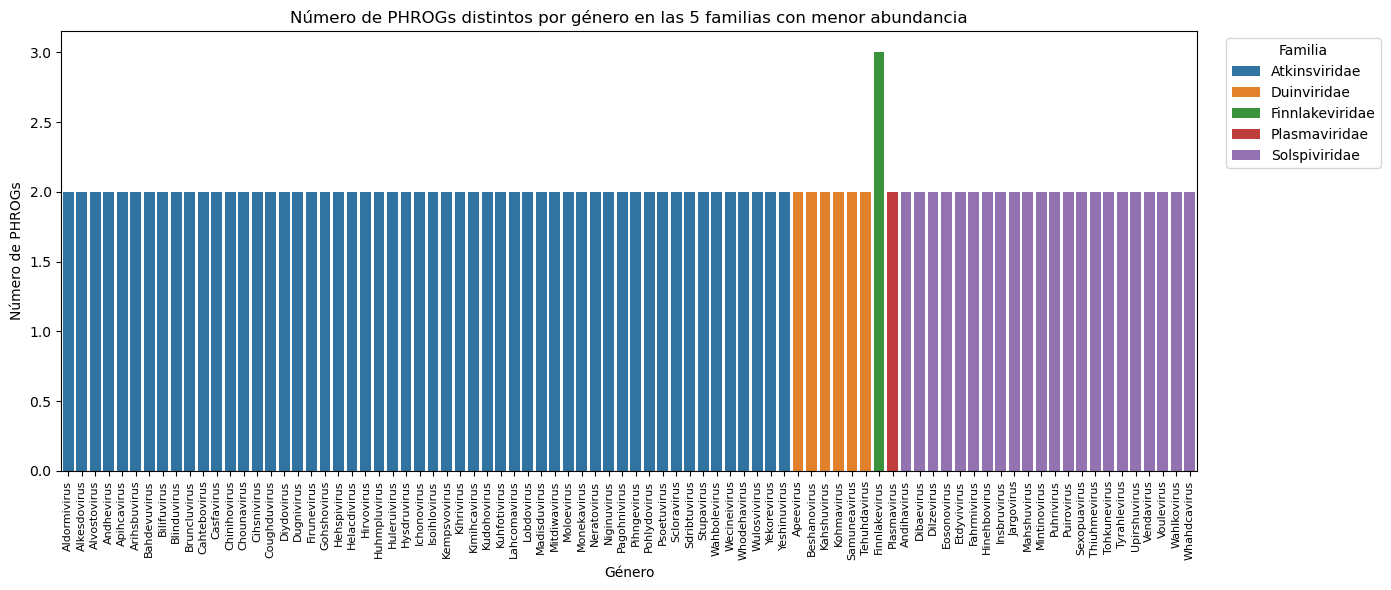

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar matriz
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Detectar columnas PHROG
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]

# Calcular número de PHROGs distintos por familia
phrogs_por_fam = (df.groupby("Family")[phrog_cols].sum() > 0).sum(axis=1)
bottom5_families = phrogs_por_fam.sort_values(ascending=True).head(5).index.tolist()

# Filtrar solo esas familias
df_bottom = df[df["Family"].isin(bottom5_families)]

# Agrupar por Family y Genus, contar PHROGs presentes
genus_family_phrog_sum = df_bottom.groupby(["Family", "Genus"])[phrog_cols].sum()
phrog_counts = (genus_family_phrog_sum > 0).sum(axis=1).reset_index()
phrog_counts.columns = ["Family", "Genus", "num_phrogs"]

# Ordenar por familia y PHROGs
phrog_counts = phrog_counts.sort_values(["Family", "num_phrogs"], ascending=[True, False])

# Graficar
plt.figure(figsize=(14, 6))
sns.barplot(data=phrog_counts, x="Genus", y="num_phrogs", hue="Family", dodge=False)
plt.xticks(rotation=90, ha="center", fontsize=8)
plt.ylabel("Número de PHROGs")
plt.xlabel("Género")
plt.title("Número de PHROGs distintos por género en las 5 familias con menor abundancia")
plt.legend(title="Familia", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig("/home/alumno08/TFM/fase2/5_imagenes/bottom5_familias_genero.png", dpi=300)
plt.show()

In [ ]:
Análisis de especificidad taxonómica por PHROG

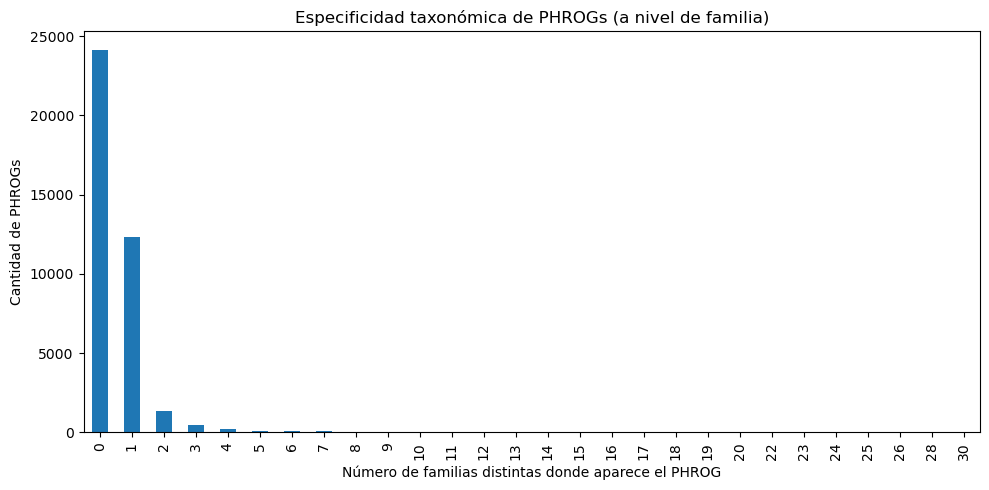

In [11]:
# Presencia/ausencia por familia
presencia_por_familia = df.groupby("Family")[phrog_cols].sum() > 0
especificidad_phrog_familia = presencia_por_familia.sum(axis=0)

# Histograma
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
especificidad_phrog_familia.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Número de familias distintas donde aparece el PHROG")
plt.ylabel("Cantidad de PHROGs")
plt.title("Especificidad taxonómica de PHROGs (a nivel de familia)")
plt.tight_layout()
plt.savefig("/home/alumno08/TFM/fase2/5_imagenes/especificidad_taxonomica.png", dpi=300)
plt.show()

In [ ]:
Análisis de co-ocurrencia (Jaccard, que es más adecuado para datos binarios)

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances

# Cargar la matriz
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Detectar columnas de PHROGs
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]
df_phrogs = df[phrog_cols].fillna(0).astype(int).clip(upper=1)

# Calcular matriz de similitud Jaccard
jaccard_dist = pairwise_distances(df_phrogs.T.values, metric="jaccard")
jaccard_sim = 1 - jaccard_dist

# Convertir a DataFrame
jaccard_df = pd.DataFrame(jaccard_sim, index=phrog_cols, columns=phrog_cols)

# Extraer pares únicos sin duplicados ni diagonal
jaccard_long = (
    jaccard_df.where(~pd.DataFrame(np.tril(np.ones(jaccard_df.shape), -1),
                                   index=jaccard_df.index,
                                   columns=jaccard_df.columns).astype(bool))
    .stack()
    .reset_index()
)
jaccard_long.columns = ["PHROG1", "PHROG2", "Jaccard_Similarity"]

# Mostrar top 10
top_pairs = jaccard_long.sort_values("Jaccard_Similarity", ascending=False).head(10)

print("Top 10 pares de PHROGs que más co-ocurren (Jaccard):")
print(top_pairs)

KeyboardInterrupt: 

In [ ]:
PCA general por familias

/tmp/ipykernel_2210921/3655196166.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


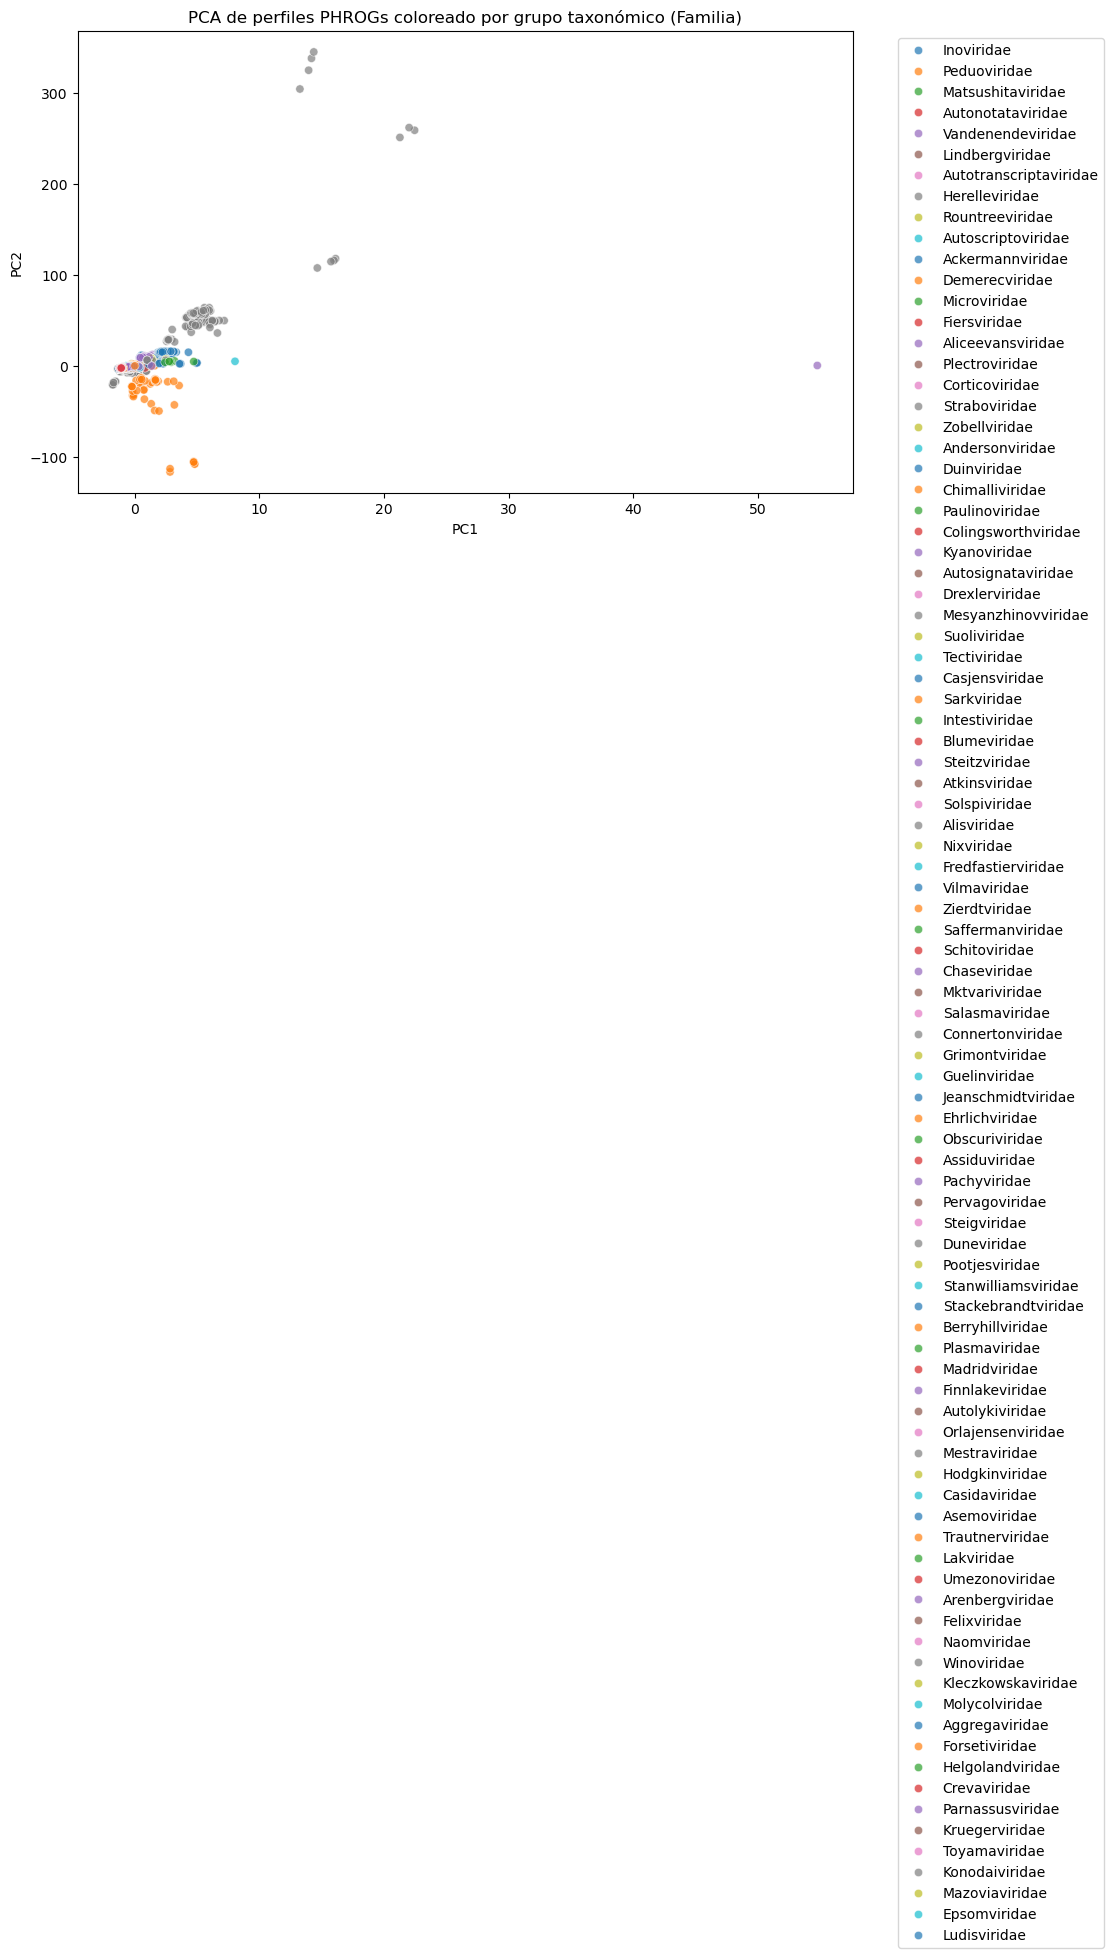

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Seleccionar columnas PHROG
phrog_cols = [col for col in df.columns if col.startswith("PHROG_")]
X = df[phrog_cols].fillna(0)

# Estandarizar
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

# Crear dataframe con resultados
df_pca = pd.DataFrame(pcs, columns=["PC1", "PC2"])
df_pca["Family"] = df["Family"] 

# Visualizar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Family", palette="tab10", alpha=0.7)
plt.title("PCA de perfiles PHROGs coloreado por grupo taxonómico (Familia)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
El PCA revela que los perfiles de PHROGs permiten distinguir parcialmente a los fagos según su clasificación taxonómica a 
nivel de familia. Se observan ciertos agrupamientos claros entre familias, aunque algunas presentan mayor solapamiento o 
dispersión, lo que refleja tanto la diversidad intra-familiar como posibles limitaciones de los PHROGs para discriminar 
entre ciertos taxones.

In [ ]:
PCA con PHROGs frecuentes y específicos

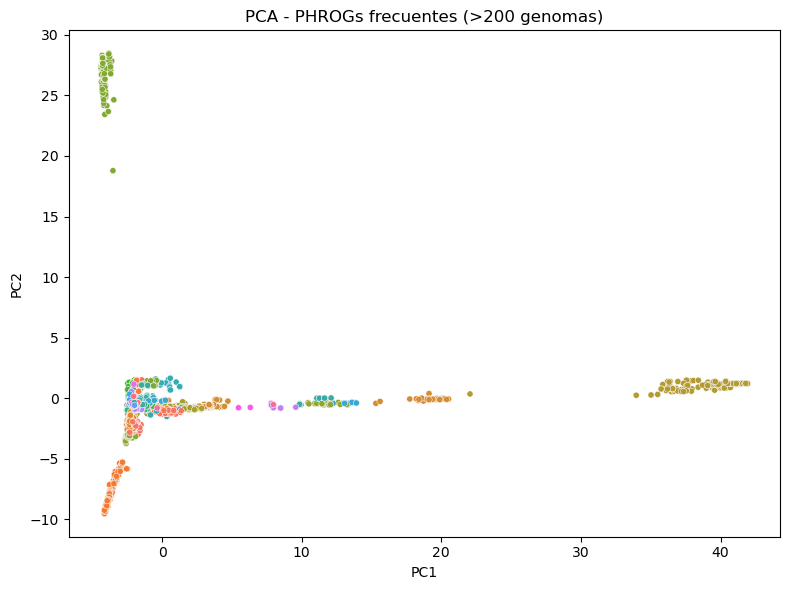

/tmp/ipykernel_2210921/1674395733.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


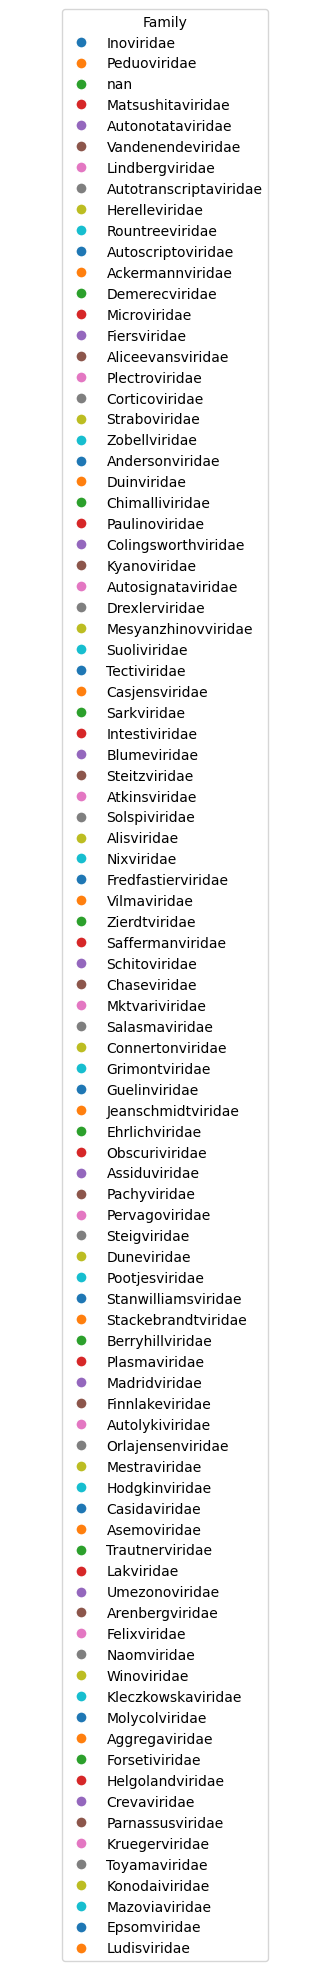

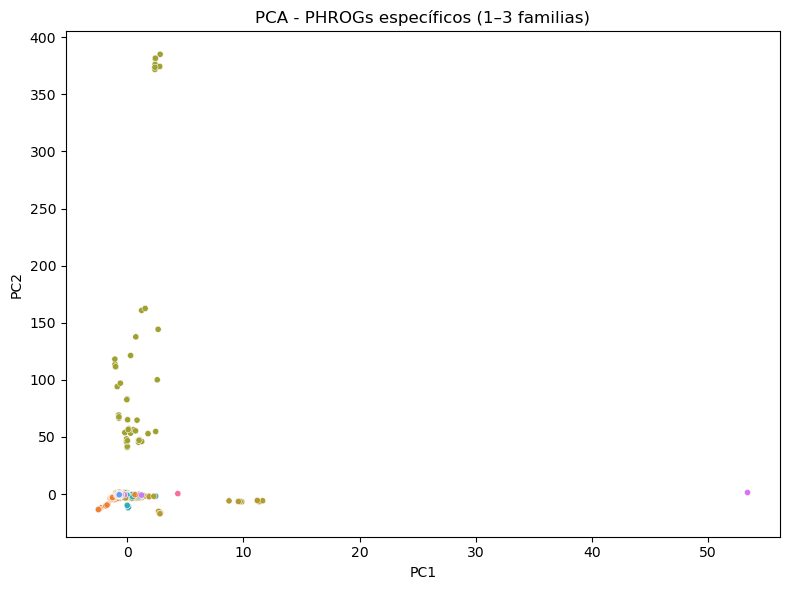

/tmp/ipykernel_2210921/1674395733.py:91: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


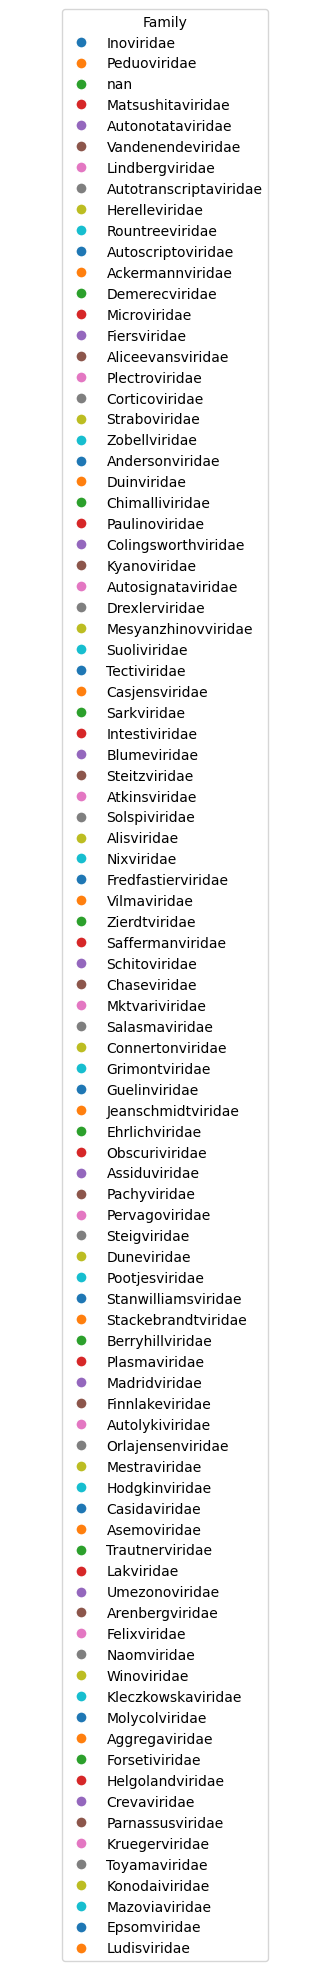

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Cargar datos
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]

# -----------------------
# PCA 1: PHROGs frecuentes
# -----------------------

# Filtrar PHROGs presentes en más de 200 genomas
frequent_phrogs = df[phrog_cols].sum(axis=0)
frequent_phrogs = frequent_phrogs[frequent_phrogs > 200].index.tolist()

# Subset y escalar
X_frequent = df[frequent_phrogs]
X_scaled = StandardScaler().fit_transform(X_frequent)

# PCA
pca = PCA(n_components=2)
pc_frequent = pca.fit_transform(X_scaled)

# Plot
df_plot_frequent = pd.DataFrame(pc_frequent, columns=["PC1", "PC2"])
df_plot_frequent["Family"] = df["Family"]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot_frequent, x="PC1", y="PC2", hue="Family", s=20, legend=False)
plt.title("PCA - PHROGs frecuentes (>200 genomas)")
plt.tight_layout()
plt.savefig("pca_frecuentes.png", dpi=300)
plt.show()

# Leyenda separada
unique_classes = df_plot_frequent["Family"].unique()
palette = sns.color_palette(n_colors=len(unique_classes))
handles = [Line2D([0], [0], marker='o', color='w', label=label,
                  markerfacecolor=color, markersize=8)
           for label, color in zip(unique_classes, palette)]

fig_legend = plt.figure(figsize=(4, 8))
plt.legend(handles=handles, title="Family", loc='center')
plt.axis('off')
plt.tight_layout()
fig_legend.savefig("leyenda_pca_frecuentes.png", dpi=300)


# -----------------------
# PCA 2: PHROGs específicos
# -----------------------

# Calcular en cuántas familias aparece cada PHROG
phrog_presence_fam = (df.groupby("Family")[phrog_cols].sum() > 0)
phrog_fam_counts = phrog_presence_fam.sum(axis=0)
specific_phrogs = phrog_fam_counts[phrog_fam_counts <= 3].index.tolist()

# Subset y escalar
X_specific = df[specific_phrogs]
X_scaled_specific = StandardScaler().fit_transform(X_specific)

# PCA
pca_spec = PCA(n_components=2)
pc_specific = pca_spec.fit_transform(X_scaled_specific)

# Plot
df_plot_specific = pd.DataFrame(pc_specific, columns=["PC1", "PC2"])
df_plot_specific["Family"] = df["Family"]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot_specific, x="PC1", y="PC2", hue="Family", s=20, legend=False)
plt.title("PCA - PHROGs específicos (1–3 familias)")
plt.tight_layout()
plt.savefig("pca_especificos.png", dpi=300)
plt.show()

# Leyenda separada para específicos
unique_classes_spec = df_plot_specific["Family"].unique()
palette_spec = sns.color_palette(n_colors=len(unique_classes_spec))
handles_spec = [Line2D([0], [0], marker='o', color='w', label=label,
                       markerfacecolor=color, markersize=8)
                for label, color in zip(unique_classes_spec, palette_spec)]

fig_legend_spec = plt.figure(figsize=(4, 8))
plt.legend(handles=handles_spec, title="Family", loc='center')
plt.axis('off')
plt.tight_layout()
fig_legend_spec.savefig("leyenda_pca_especificos.png", dpi=300)

In [16]:
print(df["Kingdom"].value_counts(dropna=False))

Kingdom
Heunggongvirae    5718
Orthornavirae      835
Loebvirae           87
Sangervirae         21
Abadenavirae        13
Bamfordvirae        12
NaN                  4
Helvetiavirae        2
Name: count, dtype: int64


In [ ]:
TAMAÑO GENOMA, %G+C, NUM GENES

In [ ]:
1. Correlación

In [17]:
import pandas as pd

# Cargar matriz original
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Detectar columnas PHROG
phrog_cols = [col for col in df.columns if col.startswith("PHROG_")]

# Calcular número total de PHROGs presentes por genoma
df["num_phrogs_presentes"] = df[phrog_cols].sum(axis=1)

# Correlaciones con variables genómicas
variables = ["genome_length", "gc_percent", "num_genes"]
correlaciones = df[["num_phrogs_presentes"] + variables].corr()

print(correlaciones["num_phrogs_presentes"])

num_phrogs_presentes    1.000000
genome_length           0.853873
gc_percent             -0.247761
num_genes               0.826610
Name: num_phrogs_presentes, dtype: float64


In [ ]:
El número de PHROGs presentes en cada genoma muestra una fuerte correlación positiva tanto con el tamaño 
del genoma (r = 0.85) como con el número total de genes (r = 0.83), lo que indica que genomas más grandes y 
con mayor capacidad codificante tienden a contener más PHROGs. En cambio, el contenido GC presenta una 
correlación negativa más débil (r = –0.25), sugiriendo que los genomas con más PHROGs tienden ligeramente a 
tener un menor porcentaje de GC, posiblemente reflejando diferencias taxonómicas o de composición genómica 
entre los virus analizados.

In [ ]:
PCA 

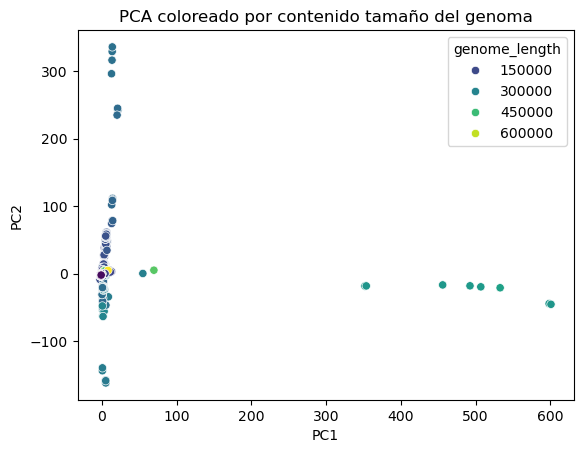

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar matriz original
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Seleccionar columnas de PHROGs
phrog_cols = [col for col in df.columns if col.startswith("PHROG_")]
X = df[phrog_cols].fillna(0)

# Estandarizar
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

# Crear nuevo DataFrame con los PCs
df_pca = pd.DataFrame(pcs, columns=["PC1", "PC2"])

# Agregar la variable que se quiere usar como color
df_pca["genome_length"] = df["genome_length"]  

# Visualizar
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="genome_length", palette="viridis")
plt.title("PCA coloreado por contenido tamaño del genoma")
plt.show()

In [ ]:
Esto sugiere que la principal fuente de variación funcional (PC1) está fuertemente influida por el 
tamaño del genoma, como ya confirmaba la alta correlación r = 0.85. Es decir, a medida que aumenta el 
tamaño del genoma, también lo hace la diversidad funcional representada por los PHROGs, y eso se refleja en 
un desplazamiento claro sobre PC1.

In [ ]:
Para seleccionar un conjunto representativo de 100 PHROGs, se calculó primero cuántos genomas contenían cada PHROG, obteniendo 
así su frecuencia absoluta. A continuación, los PHROGs se ordenaron por frecuencia y se dividieron en tres grupos: el tercio 
superior correspondía a los PHROGs más abundantes (presentes en la mayoría de genomas), el tercio intermedio a los de abundancia 
media, y el tercio inferior a los PHROGs más raros o específicos. De cada uno de estos grupos se extrajo una muestra balanceada 
para obtener un total de 100 PHROGs, asegurando así una representación equilibrada entre abundantes, intermedios y específicos. 
Este subconjunto se empleará como base para posteriores análisis de reducción de dimensionalidad y clasificación.

In [19]:
import pandas as pd

# Cargar matriz
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Detectar columnas PHROG
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]

# Calcular frecuencia absoluta de cada PHROG
phrog_freq = df[phrog_cols].sum().sort_values(ascending=False)

# Número total de PHROGs
total = len(phrog_freq)

# Dividir en tercios
top_n = total // 3
mid_n = total // 3
low_n = total - top_n - mid_n

# Obtener listas
abundantes = phrog_freq[:top_n].index.tolist()
intermedios = phrog_freq[top_n:top_n+mid_n].index.tolist()
raros = phrog_freq[-low_n:].index.tolist()

# Seleccionar PHROGs representativos
n_total = 100
n_each = n_total // 3

# Ajuste si no es divisible entre 3
abundantes_sel = abundantes[:n_each]
intermedios_sel = intermedios[:n_each]
raros_sel = raros[:(n_total - n_each*2)]

# Unificar
phrogs_seleccionados = abundantes_sel + intermedios_sel + raros_sel

print(f"PHROGs seleccionados ({len(phrogs_seleccionados)} total):")
print(phrogs_seleccionados)

PHROGs seleccionados (100 total):
['PHROG_107', 'PHROG_19', 'PHROG_22', 'PHROG_139', 'PHROG_114', 'PHROG_47', 'PHROG_267', 'PHROG_239', 'PHROG_457', 'PHROG_449', 'PHROG_446', 'PHROG_7', 'PHROG_10', 'PHROG_9', 'PHROG_86', 'PHROG_342', 'PHROG_4267', 'PHROG_12', 'PHROG_414', 'PHROG_100', 'PHROG_99', 'PHROG_160', 'PHROG_3987', 'PHROG_106', 'PHROG_4286', 'PHROG_44', 'PHROG_5', 'PHROG_1', 'PHROG_62', 'PHROG_112', 'PHROG_85', 'PHROG_102', 'PHROG_6', 'PHROG_14607', 'PHROG_14594', 'PHROG_14601', 'PHROG_26569', 'PHROG_13017', 'PHROG_26571', 'PHROG_29402', 'PHROG_11578', 'PHROG_37849', 'PHROG_37836', 'PHROG_37839', 'PHROG_37841', 'PHROG_19564', 'PHROG_19550', 'PHROG_11543', 'PHROG_19517', 'PHROG_17927', 'PHROG_24391', 'PHROG_32319', 'PHROG_32323', 'PHROG_14553', 'PHROG_24475', 'PHROG_24481', 'PHROG_10512', 'PHROG_10483', 'PHROG_24455', 'PHROG_21172', 'PHROG_21177', 'PHROG_16815', 'PHROG_16817', 'PHROG_16821', 'PHROG_10526', 'PHROG_17885', 'PHROG_19396', 'PHROG_17980', 'PHROG_19340', 'PHROG_19341'

PHROGs seleccionados (100 total):
['PHROG_107', 'PHROG_19', 'PHROG_22', 'PHROG_139', 'PHROG_114', 'PHROG_47', 'PHROG_267', 'PHROG_239', 'PHROG_457', 'PHROG_449', 'PHROG_446', 'PHROG_7', 'PHROG_10', 'PHROG_9', 'PHROG_86', 'PHROG_342', 'PHROG_4267', 'PHROG_12', 'PHROG_414', 'PHROG_100', 'PHROG_99', 'PHROG_160', 'PHROG_3987', 'PHROG_106', 'PHROG_4286', 'PHROG_44', 'PHROG_5', 'PHROG_1', 'PHROG_62', 'PHROG_112', 'PHROG_85', 'PHROG_102', 'PHROG_6', 'PHROG_14607', 'PHROG_14594', 'PHROG_14601', 'PHROG_26569', 'PHROG_13017', 'PHROG_26571', 'PHROG_29402', 'PHROG_11578', 'PHROG_37849', 'PHROG_37836', 'PHROG_37839', 'PHROG_37841', 'PHROG_19564', 'PHROG_19550', 'PHROG_11543', 'PHROG_19517', 'PHROG_17927', 'PHROG_24391', 'PHROG_32319', 'PHROG_32323', 'PHROG_14553', 'PHROG_24475', 'PHROG_24481', 'PHROG_10512', 'PHROG_10483', 'PHROG_24455', 'PHROG_21172', 'PHROG_21177', 'PHROG_16815', 'PHROG_16817', 'PHROG_16821', 'PHROG_10526', 'PHROG_17885', 'PHROG_19396', 'PHROG_17980', 'PHROG_19340', 'PHROG_19341'

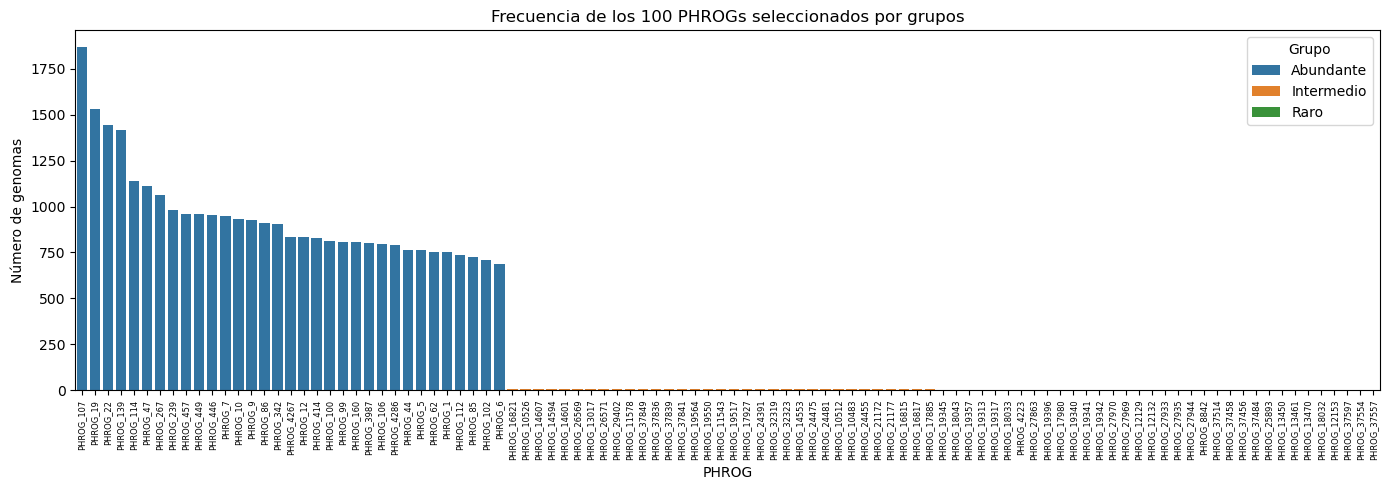

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar matriz
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Detectar columnas PHROG
phrog_cols = [col for col in df.columns if col.lower().startswith("phrog")]

# Calcular frecuencia absoluta de cada PHROG
phrog_freq = df[phrog_cols].sum().sort_values(ascending=False)

# Número total de PHROGs
total = len(phrog_freq)

# Dividir en tercios
top_n = total // 3
mid_n = total // 3
low_n = total - top_n - mid_n

# Obtener listas por tercio
abundantes = phrog_freq[:top_n].index.tolist()
intermedios = phrog_freq[top_n:top_n+mid_n].index.tolist()
raros = phrog_freq[-low_n:].index.tolist()

# Seleccionar PHROGs representativos
n_total = 100
n_each = n_total // 3
abundantes_sel = abundantes[:n_each]
intermedios_sel = intermedios[:n_each]
raros_sel = raros[:(n_total - n_each*2)]
phrogs_seleccionados = abundantes_sel + intermedios_sel + raros_sel

# Mostrar selección
print(f"PHROGs seleccionados ({len(phrogs_seleccionados)} total):")
print(phrogs_seleccionados)

# Preparar DataFrame para graficar
df_plot = pd.DataFrame({
    "PHROG": phrogs_seleccionados,
    "Frecuencia": phrog_freq[phrogs_seleccionados].values,
    "Grupo": ["Abundante"] * len(abundantes_sel) +
             ["Intermedio"] * len(intermedios_sel) +
             ["Raro"] * len(raros_sel)
})

# Graficar
plt.figure(figsize=(14, 5))
sns.barplot(data=df_plot.sort_values("Frecuencia", ascending=False),
            x="PHROG", y="Frecuencia", hue="Grupo", dodge=False)
plt.xticks(rotation=90, fontsize=6)
plt.ylabel("Número de genomas")
plt.title("Frecuencia de los 100 PHROGs seleccionados por grupos")
plt.tight_layout()
plt.savefig("/home/alumno08/TFM/fase2/5_imagenes/phrogs_por_familia.png", dpi=300)
plt.show()

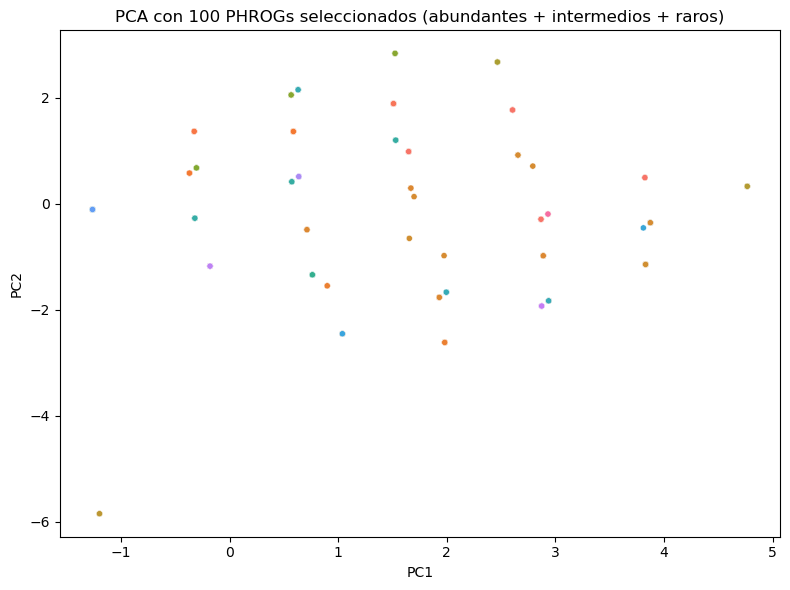

In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar matriz
df = pd.read_csv("matriz_phrogs_tax_gc_final.tsv", sep="\t", low_memory=False)

# Usar la lista de PHROGs seleccionados (ajústala si la tienes en variable externa)
phrogs_seleccionados = [  # copia aquí tu lista si no la tienes ya cargada
    'PHROG_107', 'PHROG_19', 'PHROG_22', 'PHROG_139', 'PHROG_114', 'PHROG_47',
    # ...
    'PHROG_8448', 'PHROG_8458', 'PHROG_8463'
]

# Subset y estandarización
X_sel = df[phrogs_seleccionados].fillna(0).astype(int)
X_scaled = StandardScaler().fit_transform(X_sel)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DataFrame para visualización
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Family"] = df["Family"]  # Puedes cambiar a Genus, Species...

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Family", s=20, legend=False)
plt.title("PCA con 100 PHROGs seleccionados (abundantes + intermedios + raros)")
plt.tight_layout()
plt.savefig("/home/alumno08/TFM/fase2/5_imagenes/pca_100phrogs_estratificados.png", dpi=300)
plt.show()